In [ ]:
# Population density data

import numpy as np
from scipy import stats
import pandas as pd


# Calculate population density
population_density_data = [6977, 11058, 11371, 3597, 1954, 1554, 4111, 1302, 203, 457, 248, 191, 74]

# Set desired significance level (e.g., 70%)
significance_level = 0.30

# Calculate degrees of freedom
degrees_of_freedom = len(population_density_data) - 1

# Calculate t-statistic critical value
t_critical = stats.t.ppf(significance_level, degrees_of_freedom)

# Find the threshold
best_threshold = np.percentile(population_density_data, 100 * (1 - significance_level))

print(f"Best Threshold: {best_threshold}")
print(f"T-statistic Critical Value: {t_critical}")

# Create a DataFrame
df_density = pd.DataFrame({'Population_Density': population_density_data})

# Identify city center based on the threshold
df_density['City_Center'] = df_density['Population_Density'] > best_threshold

# Display the DataFrame with city center classification
print("\nUpdated DataFrame with City Center Classification:")
print(df_density)

# Select specific values from the dataset
selected_values = df_density.loc[df_density['City_Center'], 'Population_Density'].tolist()

print(f"\nSelected Values: {selected_values}")

# Calculate the standard deviation of the selected values
s_density = np.std(selected_values)

# Handle the case where standard deviation is 0
if s_density == 0:
    polycentricity = 0
else:
    # Select the highest value from the dataset
    highest_value = df_density['Population_Density'].max(), 0

    # Calculate standard deviation for the highest value
    s_density_max = np.std(highest_value)

    # Calculate polycentricity
    polycentricity = 1 - s_density / s_density_max

print(f"\nPolycentricity: {polycentricity}")


Best Threshold: 3802.5999999999995
T-statistic Critical Value: -0.538617668201916

Updated DataFrame with City Center Classification:
    Population_Density  City_Center
0                 6977         True
1                11058         True
2                11371         True
3                 3597        False
4                 1954        False
5                 1554        False
6                 4111         True
7                 1302        False
8                  203        False
9                  457        False
10                 248        False
11                 191        False
12                  74        False

Selected Values: [6977, 11058, 11371, 4111]

Polycentricity: 0.47007104354750695


In [ ]:
# Factories data

import numpy as np
from scipy import stats
import pandas as pd

# Factory numbers data
factory_numbers = [83, 18, 46, 39, 28]


# Calculate population density (using factory numbers)
population_density_data = factory_numbers

# Set desired significance level (e.g., 70%)
significance_level = 0.30

# Calculate degrees of freedom
degrees_of_freedom = len(population_density_data) - 1

# Calculate t-statistic critical value
t_critical = stats.t.ppf(significance_level, degrees_of_freedom)

# Find the threshold
best_threshold = np.percentile(population_density_data, 100 * (1 - significance_level))

print(f"Best Threshold: {best_threshold}")
print(f"T-statistic Critical Value: {t_critical}")

# Create a DataFrame
df_density = pd.DataFrame({'Population_Density': population_density_data})

# Identify factory centers based on the threshold
df_density['Factory_Center'] = df_density['Population_Density'] > best_threshold

# Display the DataFrame with factory center classification
print("\nUpdated DataFrame with Factory Center Classification:")
print(df_density)

# Select specific values from the dataset (factory centers)
selected_values = df_density.loc[df_density['Factory_Center'], 'Population_Density'].tolist()

print(f"\nSelected Values (Factory Centers): {selected_values}")

# Calculate the standard deviation of the selected values (factory centers)
s_density = np.std(selected_values)

# Handle the case where standard deviation is 0
if s_density == 0:
    polycentricity = 0
else:
    # Select the highest value from the dataset
    highest_value = df_density['Population_Density'].max(), 0

    # Calculate standard deviation for the highest value
    s_density_max = np.std([highest_value])

    # Calculate polycentricity
    polycentricity = 1 - s_density / s_density_max

print(f"\nPolycentricity: {polycentricity}")


Best Threshold: 44.6
T-statistic Critical Value: -0.5686490630385523

Updated DataFrame with Factory Center Classification:
   Population_Density  Factory_Center
0                  83            True
1                  18           False
2                  46            True
3                  39           False
4                  28           False

Selected Values (Factory Centers): [83, 46]

Polycentricity: 0.5542168674698795


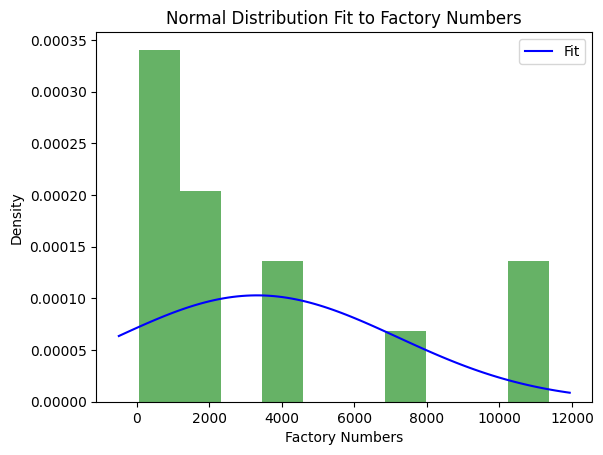

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Given factory numbers
population_density = [6977, 11058, 11371, 3597, 1954, 1554, 4111, 1302, 203, 457, 248, 191, 74]

# Fit a normal distribution to the factory numbers
mu, std = stats.norm.fit(population_density)

# Plot the histogram
plt.hist(population_density, bins=10, density=True, alpha=0.6, color='g')

# Plot the PDF of the fitted normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)

sns.lineplot(x=x, y=p, color='blue', label='Fit')
plt.xlabel('Factory Numbers')
plt.ylabel('Density')
plt.title('Normal Distribution Fit to Factory Numbers')
plt.legend()

plt.show()
